In [130]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv 
import math
%matplotlib inline
 

In [131]:
path =r'C:\Users\DELL1\Downloads\rice_images\broken_grain_1.jpg'
img = cv.imread(path)

dimensions = img.shape 
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
print(dimensions)

img = cv.resize(img, (900,600), fx = 1, fy = 1, interpolation = cv.INTER_AREA)   
dimensions = img.shape 
print(dimensions)
cv.imshow('sample image', img)
cv.waitKey(0)
cv.destroyAllWindows()

(2250, 4000, 3)
(600, 900, 3)


In [132]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray_img, (3,3), 0)
 

In [133]:
def grayHist(grayImage):
    plt.hist(grayImage.ravel(), 256)
    plt.show()

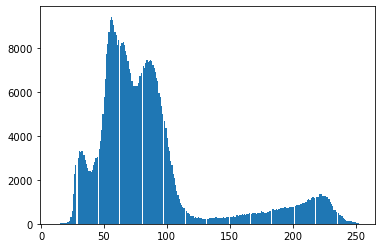

In [134]:
 grayHist(gray_img) 


In [135]:
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
cv.imshow("otsu image", otsu)
cv.waitKey(0)
cv.destroyAllWindows()


In [136]:
contours, hierarchy = cv.findContours(otsu, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0, 255, 255), 1)
cv.imshow("contours", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [137]:
print("Total rice grains =",len(contours))


Total rice grains = 442


In [146]:
count = 0
tot_area = 0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area > 0:
        
        count = count + 1
        tot_area = tot_area + area
        rect = cv.boundingRect(contours[i]) #Extract rectangle coordinates

        print("number:{} x:{} y:{} area:{}".format(count,rect[0],rect[1], area))#Print coordinates

        cv.rectangle(img,rect,(0,255,0),1)#Draw a rectangle
        cv.putText(img,str(count), (rect[0], rect[1]), cv.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
       

number:1 x:344 y:581 area:61.0
number:2 x:688 y:580 area:73.0
number:3 x:519 y:575 area:69.5
number:4 x:170 y:560 area:29.5
number:5 x:689 y:548 area:126.5
number:6 x:823 y:544 area:59.0
number:7 x:193 y:540 area:6.0
number:8 x:759 y:537 area:40.5
number:9 x:747 y:535 area:112.5
number:10 x:793 y:529 area:126.0
number:11 x:539 y:528 area:98.5
number:12 x:131 y:527 area:31.5
number:13 x:839 y:525 area:96.0
number:14 x:283 y:525 area:61.5
number:15 x:805 y:524 area:86.5
number:16 x:183 y:520 area:70.0
number:17 x:583 y:519 area:135.0
number:18 x:800 y:515 area:84.5
number:19 x:512 y:514 area:83.0
number:20 x:775 y:513 area:84.0
number:21 x:622 y:510 area:138.0
number:22 x:229 y:507 area:107.0
number:23 x:876 y:506 area:41.0
number:24 x:719 y:502 area:111.0
number:25 x:578 y:501 area:37.0
number:26 x:587 y:500 area:102.5
number:27 x:543 y:493 area:76.5
number:28 x:876 y:491 area:55.5
number:29 x:799 y:491 area:175.5
number:30 x:699 y:490 area:96.5
number:31 x:679 y:487 area:39.5
number:32

number:285 x:864 y:191 area:44.5
number:286 x:648 y:191 area:153.0
number:287 x:563 y:191 area:59.5
number:288 x:851 y:190 area:46.0
number:289 x:315 y:190 area:79.5
number:290 x:704 y:189 area:439.5
number:291 x:171 y:189 area:1024.5
number:292 x:186 y:202 area:15.5
number:293 x:776 y:185 area:79.5
number:294 x:676 y:184 area:165.5
number:295 x:434 y:184 area:92.5
number:296 x:788 y:181 area:223.0
number:297 x:816 y:175 area:194.0
number:298 x:469 y:175 area:52.0
number:299 x:94 y:175 area:65.5
number:300 x:805 y:174 area:80.5
number:301 x:695 y:174 area:167.5
number:302 x:703 y:181 area:2.0
number:303 x:704 y:180 area:2.0
number:304 x:140 y:174 area:58.0
number:305 x:846 y:173 area:69.0
number:306 x:479 y:170 area:108.5
number:307 x:275 y:169 area:555.0
number:308 x:412 y:168 area:105.5
number:309 x:495 y:167 area:107.0
number:310 x:169 y:166 area:37.5
number:311 x:711 y:164 area:53.5
number:312 x:625 y:164 area:568.5
number:313 x:639 y:178 area:12.5
number:314 x:753 y:163 area:224.5

In [147]:
avg_area=tot_area/len(contours)
print(avg_area)
avg_area=70

142.89027149321268


In [148]:
actualcount = 0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area > avg_area:
        
        actualcount = actualcount + math.ceil(area/avg_area)
        
    elif area <= avg_area:
        
        actualcount = actualcount + 1
        
print(actualcount) 

1126


In [149]:
cv.imshow("contours", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [150]:
print(math.ceil(472/avg_area))

7
